# Project 3.

# Part 1.

<img src = "Screen%20Shot%202019-06-21%20at%2012.17.12%20PM.png">

In [8]:
%%file GuessElimination.m
function [x] = GaussElimination (A,b)
% author : 
    % Han Seokhee(2013130874)
    % Chung Hyelee(2017130776)
    % Hwang Jongho(2018320177)
% input : 
    % Square Matrix A, b(the same row size with A)
% Output : 
    % Solution x in 'A*x = b'


% 1. < Primary Error Handling >
% Square? , Input dim. = Ouput dim.
    [m,n] = size(A);
    [s,~] = size(b);
    if m ~= n
        error('put square matrix for A variable.');
    elseif m ~= s
        error('the row size of A and b should match.');
    end

% 2. < FORWARD ELIMINATION >
% 1). partial pivot(with 2nd_error_handling)
% 2). Eliminate forward.

    % Make the Augmented Matrix, call it 'AG_M'
    AG_M = [A,b];
    % Row By Row Iteration
    for i=[1:m-1] % m is the row size of the input matrix A        
        
    % 1).PARTIAL PIVOTING (include Err. Handling)
            % <1>. find maximum pivot's row
                %#1 pivot advocate
        pivot_advocate_array = AG_M(i:m, i);
                %Error Handling : all zero for leading coefficient**
        if sum(abs(pivot_advocate_array))==0
            error('error occured : There is no non-zero leading coefficient at %s th column', num2str(i));
        end
                %#2 Take absolute for pivot advocate
        pivot_advocate_array = abs(pivot_advocate_array);
                %#3 get the index of the max abs pivot value excluding (i-1)rows
        [~,index_of_max] = max(pivot_advocate_array);
                %#4 Assign the index_of_max + i + (-1) to the pivot
        index_of_max_pivot_row = index_of_max+i-1;
            % <2>. switch the now i-th row with the index_of_max_pivot_row    
        % iff, the row of max pivot isn't i th 
        if index_of_max_pivot_row ~= i
        % switch row i and the max row
            AG_M([i index_of_max_pivot_row],:)=AG_M([index_of_max_pivot_row i],:);
        end
        % Now, AG_M went through Partial Pivoting %


    % 2) Make Upper Triangle
            %#1) Pick up leading coefficient.
        standard_row = AG_M(i, :);
        leading_head = standard_row(i);
        
            %#2).do elimination
        for k = [i+1:m]
            target_row = AG_M(k, :);
            target_head = target_row(i);
            AG_M(k,:) = AG_M(k,:) - ((target_head/leading_head)*standard_row);
        end
    % Row By Row ended
    end
    % Upper Triangle is formed and is saved at variable 'AG_M'
    
% 3. < BACKWARD SUBSTITUTION >
% Divide AG_M => A,b
b = AG_M(:,m+1);
A = AG_M(:,1:m);

% Backward Sub.
% * make solution array x
x=zeros(1,m);
x(1,m)=b(m)/A(m,m);
for e=m-1:-1:1
        x_m =(b(e)-sum(A(e,e+1:end).*x(e+1:end))).*1/A(e,e);
        x(e)=x_m;
end
x=x';
%END. < Function_GaussElimination ended >
end


%b). Which part of the code (forward elimination or backward substitution) takes longest to run? 
%answer : Forward elimination
% tic toc showed that foward elimination takes significantly longer time than Backward substitution.
% 
% In the light of structural difference, foward elimination requires for-loop for each row executing :
% 1). partial pivoting
% 2). forward elimination(as the nested for_loop for the above for-loop)
%
% If we call the number of rows of A to be 'n', 
% it takes exec. time that is in proportion to (O(n^2)),
% Whereas the < Backward Substitution > only involves row by row substitution computing from backward,
% taking execution time in proportion to (O(n)).


Created file '/Users/sucky/Desktop/Git_Projects/19-1R-EM-TP/Project_3/GuessElimination.m'.


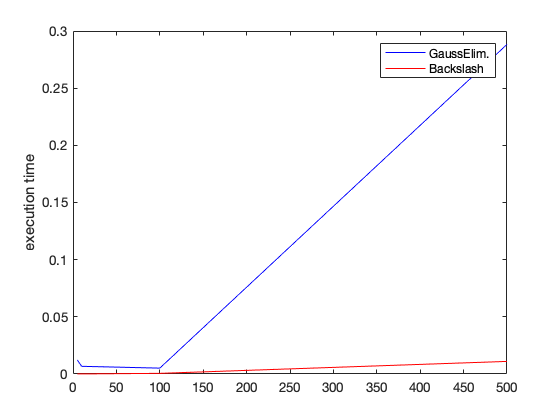

In [9]:
    % author :
    % Han Seokhee(2013130874)
    % Chung Hyelee(2017130776)
    % Hwang Jongho(2018320177)
% < Explantion for the script >
    % Test GaussElimination function, 
    % By comparing the its tic-toc exec. time with matlab build-in '\' function.

% basic clearing
close all; clear all; clc

% Assign exec. times for each array.
T_gauss = [];
T_backslash = [];
k = [5,10,100,500];
m = 1;

for i = k
    A = rand(i);
    b = rand(i,1);
    % save gauss eli. time in t1
    tic;
    GaussElimination(A,b);
    t1 = toc;
    % save matlab backlash time in t2
    tic
    A\b;
    t2 = toc;
    % save t1, t2 in T_gauss, T_matlab
    T_gauss(m) = t1;
    T_backslash(m) = t2;
    % add one for iteration
    m = m+1;
end

    % plot T_gauss and T_backslash according to size array k
plot(k, T_gauss, 'b');
hold on
plot(k, T_backslash, 'r');
ylabel('execution time')
legend('GaussElim.','Backslash');



%c).How much faster is the built-in Matlab function than your function for each time step?
%Why do you think it is faster?

% The '\' is, 'in average' about 30~70 times faster, though there were
% fluctuation for each time we exectuted the script, in the range of n size given in our test.
% The gap in computation speed grow larger as the row size of A increases.
% This gap comes from versatility of '\' backslash command in Matlab.
% Matlab '\' has versatile flowchart in getting solution for Ax = b 
% It asks which type of Matrix it is ex) full matrix? sparse? Hermitian? Upper Hassenberg?
% And It offers many types of solvers such as QR solver, LDL solver, LU solvoer, Cholsky solvers etc for different
% types of matrices in getting solution. 
% These versatile framework of choosing supposedly(by matlab developers)-the-most-efficient
% solvers, usually taking good advatages of 'symmetry', shortens the computation time.
% On the other hand, our GaussElimination uses the same structure of solver no matter which it computes.


# Part2.

<img src = "Screen%20Shot%202019-06-21%20at%2012.17.29%20PM.png">

In [10]:
    % author :
    % Han Seokhee(2013130874)
    % Chung Hyelee(2017130776)
    % Hwang Jongho(2018320177)
% < Explantion for the script >
    % Calculates X(total_value) using fomula X = MX + b
% b <- final demand, MX <- internal(intermediate) demand.

% Basic clearing
close all; clear all; clc

b = [10; 15; 20];     % a final demand of steel, energy, cars
M = [.1 .65 .05; .04 .2 .1; .6 .2 .05];     % internal demands
A = (eye(size(M,1)) - M);     % b = A*X
X = GaussElimination(A, b);     % total output
X   %or disp(X)

% 1) Why do the numbers in M not add up to US $1?
% Here it is given that, for a production of one dollor of Steel,
% as intermediate goods,
% 0.1 dollor-worth of steel, 0.65 dollor-worth of energy, and 0.05 dollor-worth of car
% are required to produce it.
% Inputs of other sectors as internal goods for a production of a dollor of a sector
% don't necessarily add up to one, and practically the add-value of
% production costs for a production of one unit of sector is ,rather, smaller the better.



% 2) Does the solution X add up to the sum of the final demand? If not, why not?
% No. 
% X does not add up to sum of final demand
% because as we can see in the given fomula for X = MX + b ( b : final
% demand ) Total Output(or Total production) is composed of 
% 1).internal demand, which means how much S,E,C is
% needed in the process of production of the final demand(b)
% 2). And the final demand.
% Thus, total_output(X) which is = intermediate(internal)_demand(MX) + final_demand(b)
% cannot add up to b.


X =

   32.7263
   26.2935
   47.2573



# Part 3.

<img src = "Screen%20Shot%202019-06-21%20at%2012.18.30%20PM.png">

In [11]:
%%file eigenInteractive.m
% Function Name : eigenInteractive(.m)
    % author :
    % Han Seokhee(2013130874)
    % Chung Hyelee(2017130776)
    % Hwang Jongho(2018320177)
% < Explantion for the function >
    % 1). Create three draggable points in an interactive plot
    %     (a vector v and two column vectors of a 2-by-2 matrix A)
    % 2). Show the corresponding eigenvectors and eigenvalues
    %     if they are real
    % inspired by
    % https://stackoverflow.com/questions/9646146/how-to-make-a-matlab-plot-interactive/9650495
    
function eigenInteractive(Pos)

% call the function WITHOUT any input argument
% to setup the figure and the environment

if nargin == 0
    
    % clean up
    close all;
    clear all;
    clc;

    % create a figure
    figure(1);
    axis([-10 10 -10 10]);
    hold on;

    % global variables that hold the three impoint handles
    global a1 a2 v
    
    % create first points
    a1 = impoint(gca,1,2);   % first column vector of A
    setString(a1,'a_1');
    a2 = impoint(gca,2,.5);  % second column vector of A
    setString(a2,'a_2');
    v = impoint(gca,2,3);
    setString(v, 'v');
    
    % Call subfunction
    drawInfo(a1,a2,v)

    % Add callback to each point
    addNewPositionCallback(a1,@eigenInteractive);
    addNewPositionCallback(a2,@eigenInteractive);
    addNewPositionCallback(v,@eigenInteractive);
    
    disp('setup done')
else

    % If we get an input argument, its the position
    % from the callback, so we know that the user
    % dragged a point.
    
    % access the plot and impoint handles
    global H1 H2 H3 H4 H5 H6 H7 H8 H9 H10 H11 H12 H13 H14 H15 a1 a2 v

    
    % remove old arrows
    delete(H1)
    delete(H2)
    delete(H3)
    delete(H4)
    delete(H5)
    delete(H6)
    delete(H7)
    delete(H8)
    delete(H9)
    delete(H10)
    delete(H11)
    delete(H12)
    delete(H13)
    delete(H14)
    delete(H15)
    % draw new arrows
    drawInfo(a1,a2,v)
    
end
end

function drawInfo(a1,a2,v)

P = zeros(2,2);     % P is the matrix A

% get X and Y coordinates for the draggable points.
P(:,1) = getPosition(a1);
P(:,2) = getPosition(a2);
V = getPosition(v);

Av = P*V';

% find eigenvectors and eigenvalues of the matrix A
[vec, val] = eig(P);
e1 = vec(:, 1);     % first eigenvector
e2 = vec(:, 2);     % second eigenvector

% plot arrows and text
global H1 H2 H3 H4 H5 H6 H7 H8 H9 H10 H11 H12 H13 H14 H15
H1 = plot([0 P(1,1)], [0 P(2,1)], 'b');
H2 = plot([0 P(1,2)], [0 P(2,2)], 'g');
H3 = text(3,7,sprintf('A = $\\left [\\begin{array}{cc} a_1 & a_2\\end{array}\\right ]$ = $\\left [\\begin{array}{cc} %.02f & %.02f\\\\%.02f & %.02f\\end{array}\\right ]$',P(1,1),P(1,2),P(2,1),P(2,2)),'Interpreter','Latex'); 
H4 = text(5,5,sprintf('v = $\\left [\\begin{array}{cc} %.02f \\\\%.02f \\end{array}\\right ]$',V(1),V(2)),'Interpreter','Latex'); 
H5 = plot([V(1) Av(1)], [V(2) Av(2)], 'k');
H6 = plot(Av(1), Av(2), 'ro');
H7 = text(5,3,sprintf('Av = $\\left [\\begin{array}{cc} %.02f \\\\%.02f \\end{array}\\right ]$',Av(1),Av(2)),'Interpreter','Latex'); 
H8 = text(Av(1), Av(2), 'Av');
if isreal(vec) && isreal(val)
    H9 = plot([0 e1(1)], [0 e1(2)], 'k');
    H10 = plot([0 e2(1)], [0 e2(2)], 'k'); 
    H11 = text(e1(1), e1(2), 'e1');
    H12 = text(e2(1), e2(2), 'e2');
    H13 = text(5,1,sprintf('e1 = $\\left [\\begin{array}{cc} %.02f \\\\%.02f \\end{array}\\right ]$',e1(1),e1(2)),'Interpreter','Latex'); 
    H14 = text(5,-1,sprintf('e2 = $\\left [\\begin{array}{cc} %.02f \\\\%.02f \\end{array}\\right ]$',e2(1),e2(2)),'Interpreter','Latex'); 
    H15 = text(-7,7,sprintf('Eigenvalues are %.02f and %.02f ',val(1,1),val(2,2)),'Interpreter','Latex'); 
    
    % reverse the order of the elements to keep
    % the impoints on top
    t=get(gca,'Children');
    set(gca,'Children',[t(18) t(17) t(16) t(15) t(14) t(13) t(12) t(11) t(10) t(9) t(8) t(7) t(6) t(5) t(4) t(3) t(2) t(1)]);
    
else
    H15 = text(-7,7,'Eigenvalues or eigenvectors are not real'); 
    
    % reverse the order of the elements to keep
    % the impoints on top
    t=get(gca,'Children');
    set(gca,'Children',[t(12) t(11) t(10) t(9) t(8) t(7) t(6) t(5) t(4) t(3) t(2) t(1)]);
end
end

Created file '/Users/sucky/Desktop/Git_Projects/19-1R-EM-TP/Project_3/eigenInteractive.m'.


# Do this Custom EigenVector Calculation App in your native matlab app

setup done


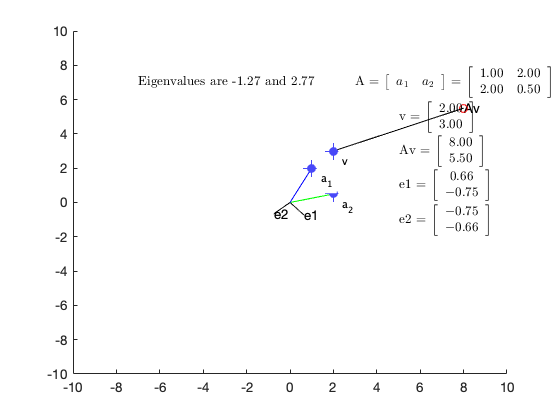

In [12]:
eigenInteractive